In [1]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
#sns.set(font_scale = 5)


# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# # # Data Cleaning and Formatting

# # Load in the Data and Examine

# Read in credit into a dataframe 
credit = pd.read_csv('credit_train.csv')

# Display top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
credit.shape

(100514, 19)

In [4]:
# # Data Types and Missing Values

# See the column data types and non-missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [5]:
# Statistics for each column
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# These two features are only for identification.

In [7]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(credit)

# A curious thing about the table below is the last 10 features have the same number o missing values.
# I will go deeper and figure out what is happening.

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


In [9]:
# Drop the columns with > 50% missing
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [10]:
credit[credit['Years of Credit History'].isnull() == True]

# Here I can see that the last 514 observations are NaN values.

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
credit.drop(credit.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [12]:
# As the number of missing values is so low in the 'Maximum Open Credit' I will drop them.

for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


In [13]:
# As the number of missing values is so low in the 'Tax Liens' I will drop them.

for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19149,19.2
Annual Income,19149,19.2
Years in current job,4222,4.2
Bankruptcies,194,0.2


In [14]:
# As the number of missing values is so low in the 'Bankruptcies' I will drop them.

for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)


Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


In [15]:
# Now I will use the 'mean' technique to fill the NaN values.

credit['Credit Score'].fillna(credit['Credit Score'].mean(), inplace=True)
missing_values_table(credit)

# The feature 'Years in current job' didn't fill because has categorical values.

Your selected dataframe has 16 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Annual Income,19111,19.2
Years in current job,4222,4.2


In [16]:
credit['Annual Income'].fillna(credit['Annual Income'].mean(), inplace=True)
missing_values_table(credit)


Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,4222,4.2


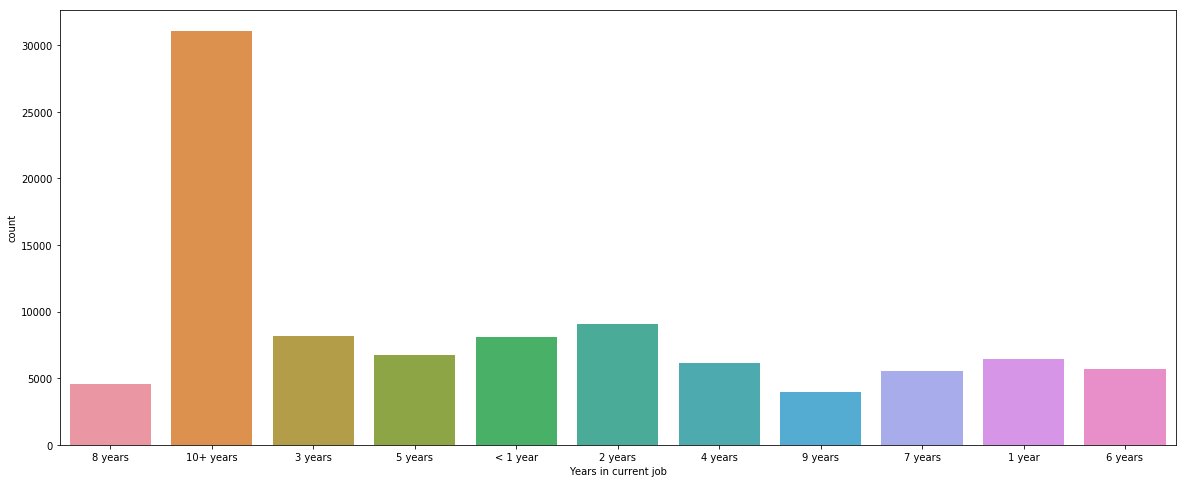

In [17]:
# I will figure out what value is more present in this feature.

plt.figure(figsize=(20,8))

sns.countplot(credit['Years in current job'])

# We can see that the value '10+ years' is strongly present in this feature, so I will use this value to fill the 
# missing values.

In [18]:
credit['Years in current job'].fillna('10+ years', inplace=True) # fill with '10+ years'.
missing_values_table(credit)
#credit.info()
# No missing values anymore.

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


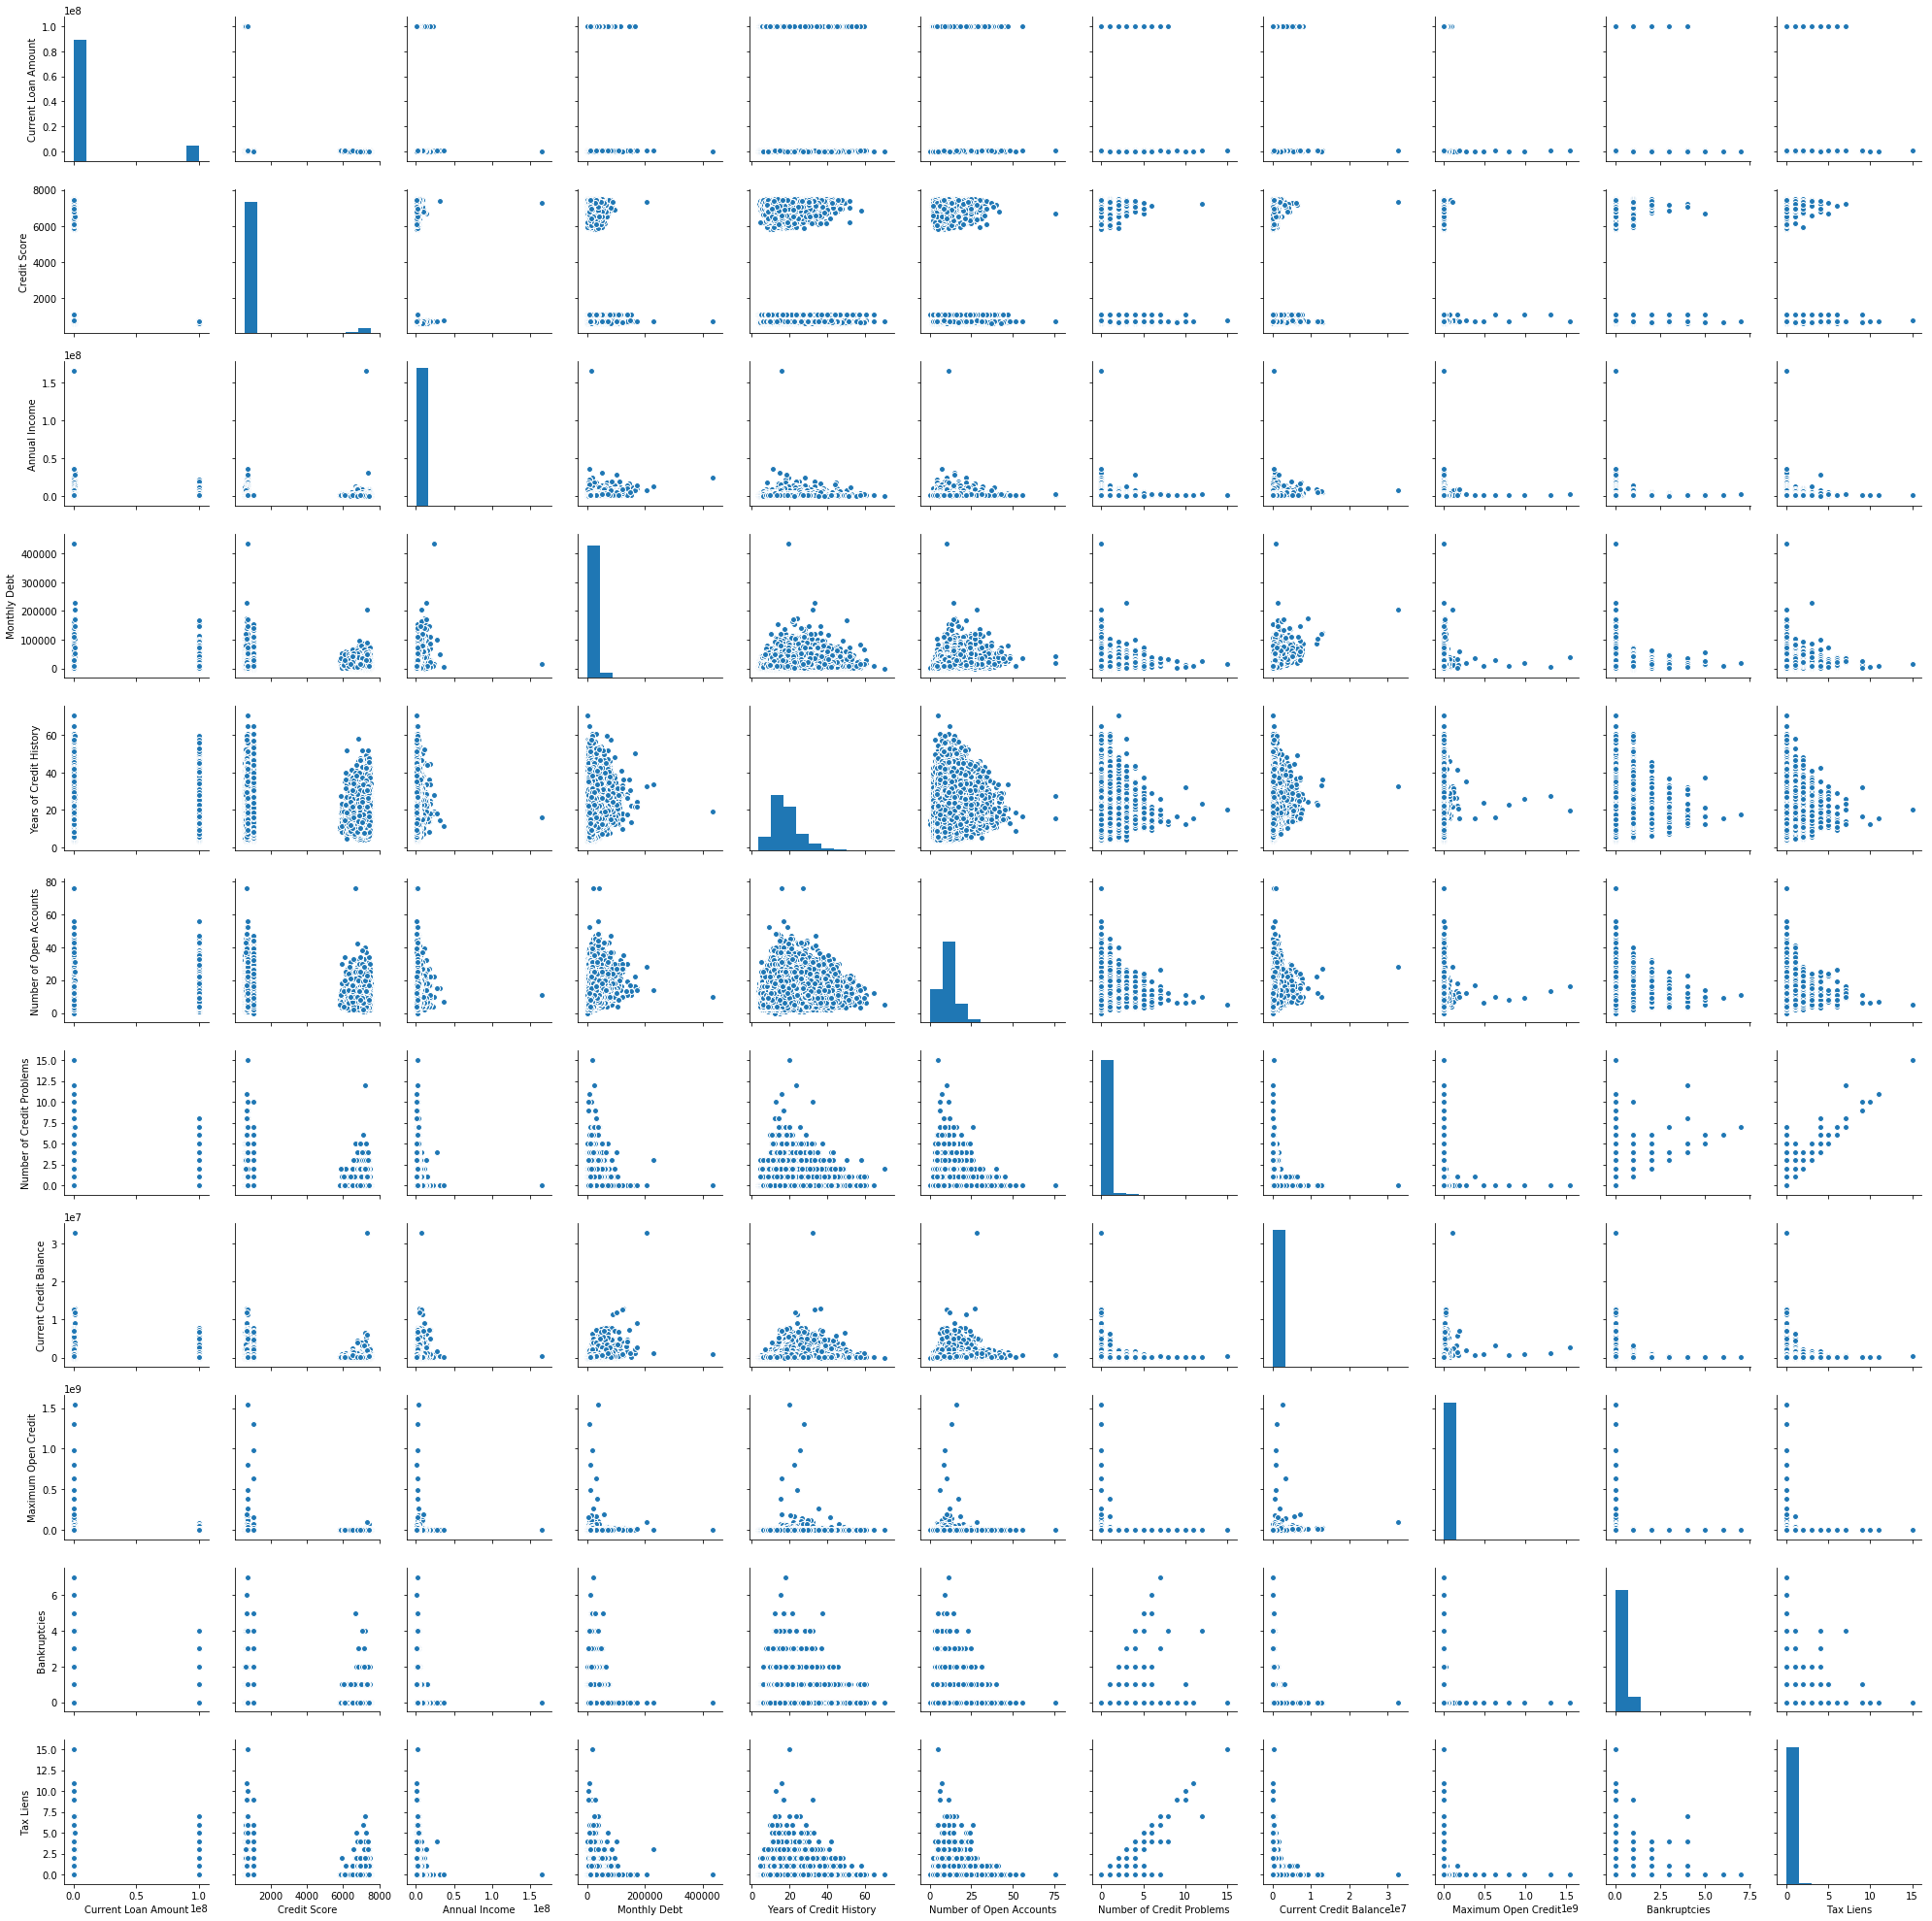

In [19]:
# # # Exploratory Data Analysis

sns.pairplot(credit)

# We can see in this pairplot graph that this dataset is extremely concentraded is 'zero' value, so here I won't
# use the overfitting method.

In [20]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = credit.corr()['Credit Score'].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005726
Tax Liens                    0.004765
Current Credit Balance       0.000168
Monthly Debt                -0.001457
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.008652
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64>


In [21]:
# # # Feature Engineering and Selection

credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [22]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [23]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x

In [24]:
# Remove the collinear features above a specified correlation coefficient
credit = remove_collinear_features(credit, 0.6);

In [25]:
credit.shape

(99794, 42)

In [26]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79835, 41)
(19959, 41)
(79835, 1)
(19959, 1)


In [27]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Sri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y

In [28]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [29]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [30]:
X_train

array([[-0.36102332, -0.29098075,  0.52858264, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35523419, -0.26165702,  0.48407171, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.357882  , -0.26165702, -0.35823972, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       ...,
       [-0.36101847, -0.27744672,  0.47657733, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.36255586, -0.25789757, -0.77726096, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35567642, -0.2556419 ,  0.1256506 , ..., -0.05147771,
        -0.03206516, -0.0343339 ]])

In [31]:
X_test

array([[-3.63944227e-01, -2.69927815e-01, -7.23642936e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.62381883e-01, -1.29610336e-03,  4.31089330e-04, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.58970926e-01, -2.93236417e-01,  2.06722719e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       ...,
       [-3.62962737e-01, -2.57145679e-01,  1.03184451e+00, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.59089453e-01, -2.81958061e-01,  1.27927374e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.63813916e-01, -2.48874885e-01, -4.02692887e-02, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02]])

In [32]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [33]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross=fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)


C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

Logistic Regression Performance on the test set: Cross Validation Score = 0.8197


In [34]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8001


In [35]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradient Boosting Classification Performance on the test set: Cross Validation Score = 0.8198


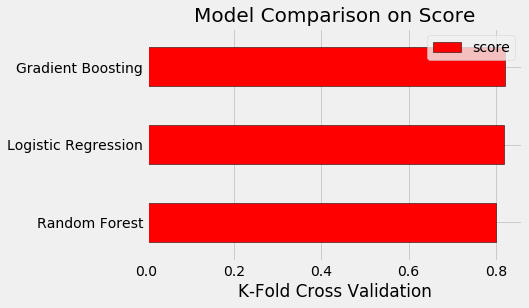

In [36]:
# Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'Random Forest',
                                            'Gradient Boosting'],
                                 'score': [logr_cross, 
                                         random_cross, gb_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);